<a href="https://colab.research.google.com/github/MaksonViini/Analisando_dados/blob/master/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***MEU PRIMEIRO PROJETO***

In [17]:
# Importando as biblitecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importando o data frame
df = pd.read_csv('https://raw.githubusercontent.com/MaksonViini/Learning-R/master/ENAP%20Analise%20de%20Dados/diabetes.csv')

###**Verificando e analisando os dados de forma descritiva**

In [4]:
# Fazendo a analise descritiva dos dados
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Verificando os valores NaN, valores faltantes
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7f6eff8bc128>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6eff8bcb38>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6eff8cb5f8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6eff8cb278>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6eff8bc438>,
  <matplotlib.lines.Line2D at 0x7f6eff8bc7b8>]}

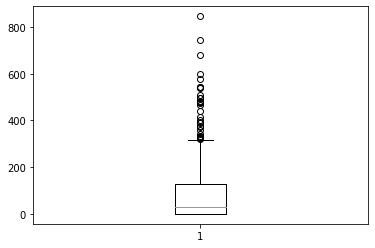

In [18]:
# Plotando grafico boxplot
plt.boxplot(df['Insulin'])

###**Histogramas**

(array([246., 178., 125.,  50.,  83.,  52.,  11.,  19.,   3.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 10 Patch objects>)

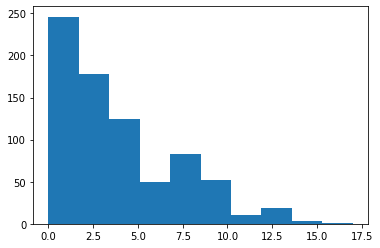

In [19]:
plt.hist(df['Pregnancies'])

(array([300., 157.,  92.,  86.,  52.,  34.,  26.,  16.,   4.,   1.]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <a list of 10 Patch objects>)

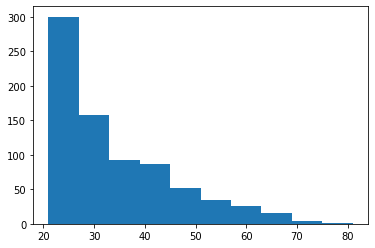

In [20]:
plt.hist(df['Age'])

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <a list of 10 Patch objects>)

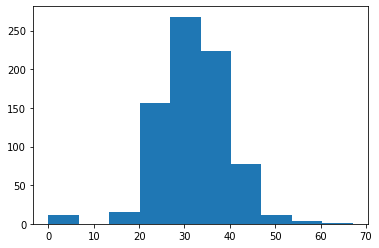

In [21]:
plt.hist(df['BMI'])

###**Dividindo os dados e treinando o modelo**

In [30]:
from sklearn.model_selection import train_test_split

In [34]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
x = df[['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']]
y = df['Outcome']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [52]:
from sklearn.svm import SVC

In [53]:
dtc = SVC().fit(x_train, y_train)

In [54]:
y_pred = dtc.predict(x_test)

In [55]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtc, x_train, y_train) 

array([0.77777778, 0.75      , 0.78504673, 0.71028037, 0.74766355])

In [56]:
predicoes = dtc.predict(x_test)

In [57]:
predicoes

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[133,  18],
       [ 42,  38]])

In [60]:
score=dtc.score(x_test, y_test)
score

0.7402597402597403